# 1. Import Functions and Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from ipywidgets import interact, fixed
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# 2. Load and process the dataset

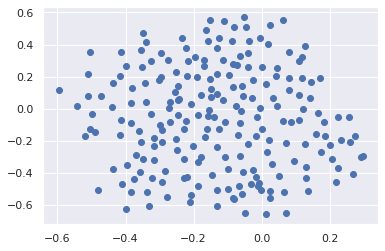

In [ ]:
data = pd.read_csv('Dataset-3.csv')
data_train = data.loc[0:210,['Xtrain', 'Unnamed: 1', 'ytrain']]
data_test = data.loc[0:199,['ytest', 'Xtest', 'Unnamed: 5']]

X_train = np.c_[data_train['Xtrain'], data_train['Unnamed: 1']]
y_train = data_train['ytrain']

X_test = np.c_[data_test['Xtest'], data_test['Unnamed: 5']]
y_test = data_test['ytest']
plt.scatter(data_train['Xtrain'], data_train['Unnamed: 1'])

The shape of the data is circular, centering at around (-0.1, 0)

In [ ]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = y_train[:,] == 0
    pos = y_train[:,] == 1

    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(X_train[pos][:,0], X_train[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(X_train[neg][:,0], X_train[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);


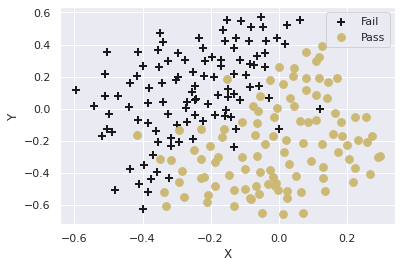

In [ ]:
plotData(data, 'X', 'Y', 'Fail', 'Pass')

I believe a linear SVC can be used since there is a somewhat distinct line separating the pass and fail categories

# 3. SVM Train and Hyper-parameter Optimization

In [ ]:
model = SVC ()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

search = RandomizedSearchCV(model, tuned_parameters, n_iter=16, scoring='accuracy', n_jobs=1, cv=cv)
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=16. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Score: 0.9225913621262459
Best Hyperparameters: {'kernel': 'linear', 'C': 10}


In [ ]:
model = SVC(kernel='linear', C=10)
model.fit(X_train, y_train)

SVC(C=10, kernel='linear')

These choices make sense. Since the data looks like it is linearly separable, a linear kernel is the best choice. A C value of 10 allows for minimal missclassification in the training data.

In [ ]:
model.support_vectors_

array([[-1.8664e-01, -3.3041e-01],
       [-3.4793e-01, -3.1287e-01],
       [-2.2811e-01, -1.2573e-01],
       [-7.6037e-02,  1.4620e-02],
       [ 1.1521e-02,  1.5497e-01],
       [-4.1705e-01, -1.6082e-01],
       [-3.1567e-01, -3.1871e-01],
       [-2.0046e-01, -2.3099e-01],
       [-1.0830e-01, -8.4795e-02],
       [-2.4850e-01, -2.5760e-01],
       [-2.2776e-01, -3.1491e-01],
       [-2.8376e-01, -3.8450e-01],
       [-2.9205e-01, -4.5409e-01],
       [-3.3767e-01, -5.1959e-01],
       [-1.7799e-01, -2.9854e-01],
       [-1.6555e-01, -1.7573e-01],
       [-1.6141e-01, -1.2661e-01],
       [ 3.4562e-04,  2.5819e-01],
       [ 7.9147e-02,  3.5643e-01],
       [-2.6613e-02,  1.8041e-01],
       [-5.3571e-02,  7.8070e-02],
       [-6.3940e-02, -8.5672e-02],
       [-6.1866e-02, -1.6082e-02],
       [ 4.1820e-02,  2.0497e-01],
       [ 7.9147e-02,  1.9269e-01],
       [ 4.5968e-02,  2.5409e-01],
       [ 1.0818e-01,  2.9912e-01],
       [ 1.1855e-01,  3.1959e-01],
       [ 1.2684e-01,

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca() #create a new axis if there is no axis in the fig.
    xlim = ax.get_xlim() #if there is an axis, get the x-axis limit
    ylim = ax.get_ylim() #if there is an axis, get the x-axis limit

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape) #Evaluate the decision function for the samples in xy.

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

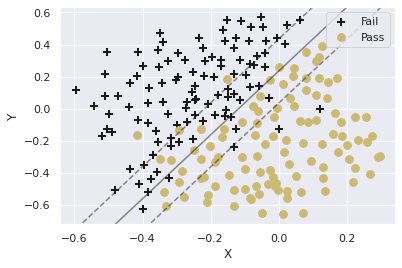

In [ ]:
plotData(data, 'X', 'Y', 'Fail', 'Pass')
plot_svc_decision_function(model)

# 4. Test the SVM Model

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       113
         1.0       0.95      0.90      0.92        87

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



The model preforms remarkably well. The f-1 scores are on average 93% correct, meaning the model correctly labeled that percent of samples correctly.